In [1]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import os
import koreanize_matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from pandas.plotting import boxplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 나눔고딕 경로 찾기 (macOS 기준)
font_path = fm.findfont("NanumGothic")
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트와 마이너스 기호 깨짐 방지 설정
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:

path = "./csv_dir/bank-additional-full.csv"

df = pd.read_csv(path, sep=";", header=0,
)
# age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# 데이터 개수 : 4만 1천개
- 고객 데이터
- 캠페인데이터
- 경제 데이터

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Unknown개수 확인
- 어케 처리하냐

In [5]:
unknown_summary = (df == "unknown").sum().sort_values(ascending=False)

print(unknown_summary)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64


## y 컬럼 확인
- 거의 뭐 9ㄷ1임. 이래서 accuracy 쓰면안된다고. 다 틀렸다고해도 정답율 90퍼임 ㄷㄷ

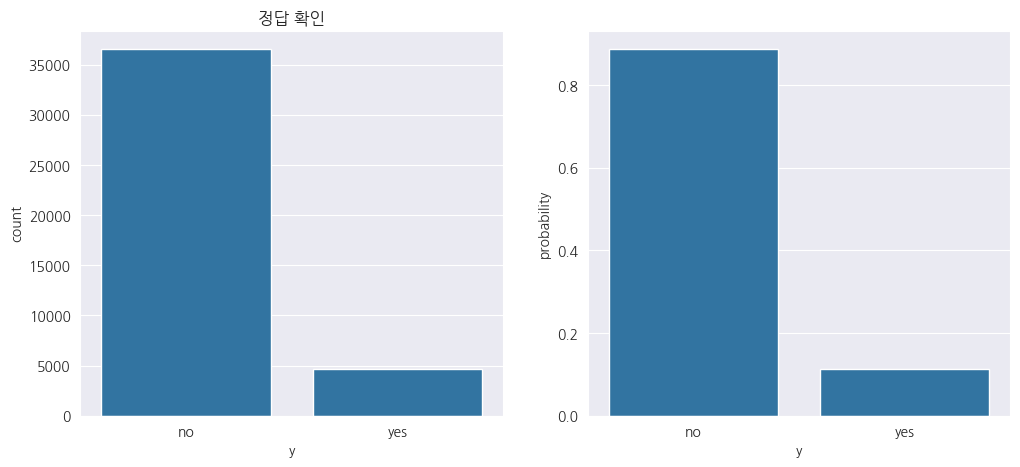

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [6]:

plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.title("정답 확인")
sns.countplot(data = df, x = 'y')


plt.subplot(1,2,2)
sns.countplot(data = df, x = 'y', stat='probability')
plt.show()
print(df['y'].value_counts(normalize=True))

# 중복값 확인
- 직업, 나이, 교육, 대출이 같을수가있나 ㅇㅇ 있지
- 물가지수, 고용변동률, 고용자수는 모든 사람이 똑같은데, 같은 week, month면 같을 수도 있다고 생각.
- 그럼 개인정보도 같고 경제정보도 같을 수도 있음.
- 근데 12row 니깐 지워도 ㄱㅊ을듯...?

In [7]:
df = df.drop_duplicates()

# 결측치 확인
- 없음

<Axes: >

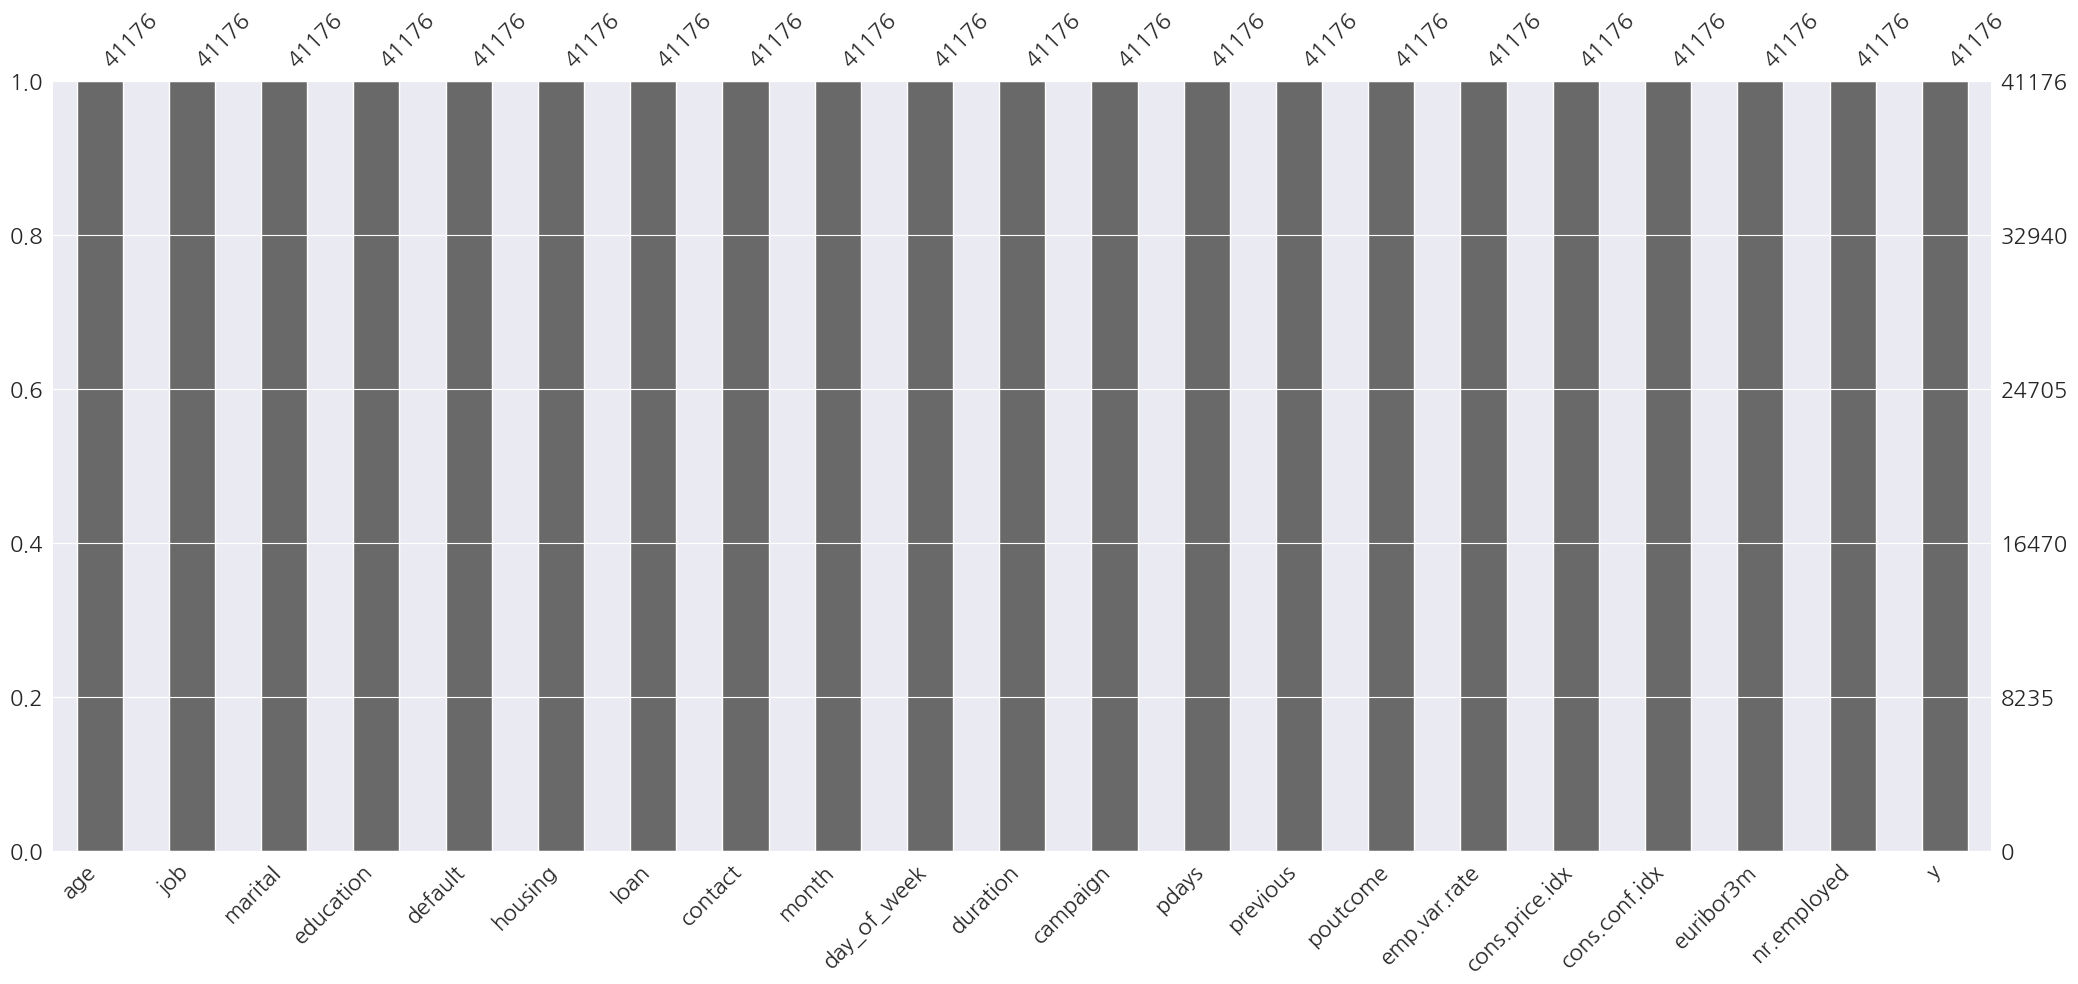

In [8]:
msno.bar(df)

# 이상치 확인

### Age
- 20~40대에 몰려있고 70살부터 이상치임
- 근데 70이 이상치라고 생각 안 하는데
- 98세까지 있음. 충분히 살아서 전화받을만함. -> 더 자세히 보려면 직업을 확인해봐야할듯?
- 98세에 블루칼라 직종이면 음 곧 갈거같으니깐 -> 80세에 블루칼라 한명잇음. -> 뭐 이상한 데이터는아닌 거 같음


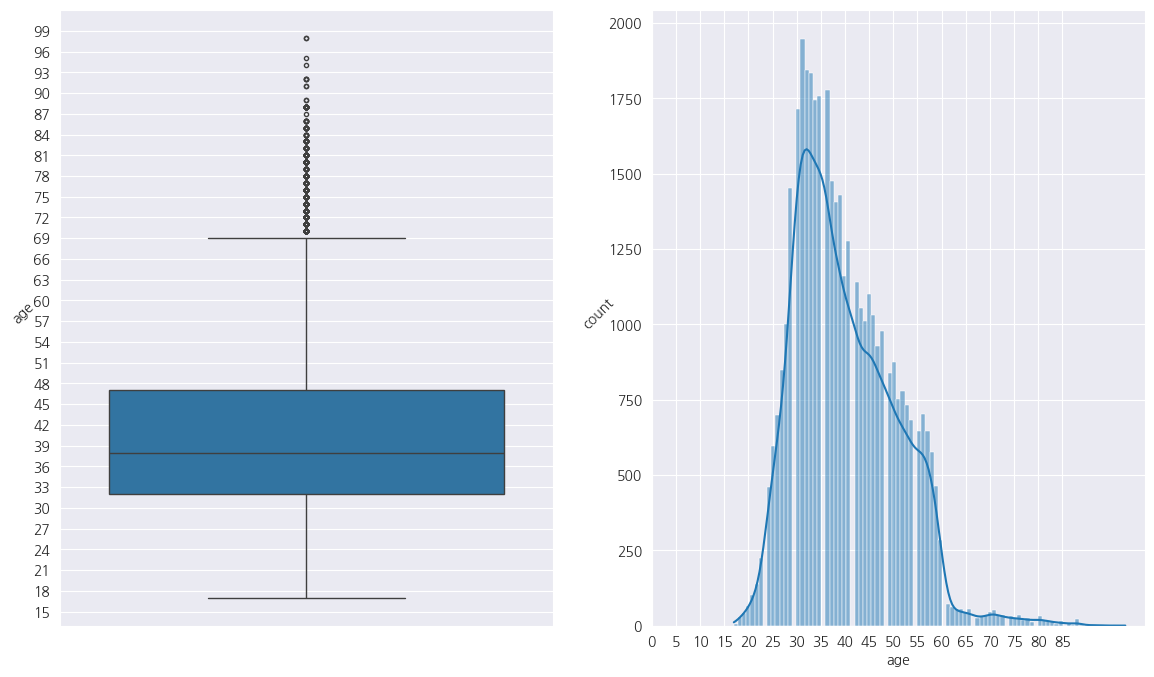

In [9]:
plt.figure(figsize = (14, 8))
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'age',flierprops=dict(marker='o', markersize=3))
plt.yticks(np.arange(15,100,3))
plt.ylabel('age',rotation = 45)

plt.subplot(1,2,2)
sns.histplot(data = df, x = 'age',kde=True)
plt.ylabel("count",rotation=45)
plt.xticks(np.arange(0, 90, 5))


plt.show()

In [10]:
df['age'].value_counts()
df[df['age'] >= 80]['job'].value_counts()

job
retired        133
housemaid       13
unknown          2
management       1
blue-collar      1
Name: count, dtype: int64

In [11]:
df[(df['age'] >= 80) & (df['job'] =='blue-collar')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30079,80,blue-collar,married,high.school,no,no,no,cellular,apr,fri,...,6,999,3,failure,-1.8,93.075,-47.1,1.4,5099.1,no


## Duration (마지막 연락 시간)
- 단위: sec
- 1544개 다른 초 있으니깐 히스트로
- 전화를 하기전에 이사람이 가입할지 안할지 알아야함. 모델링할때 빼고 해야할듯
- 상식적으로 전화를 길게하면 가입하는러가ㅗㅅ생각
- **지속 시간: 마지막 접촉 지속 시간(초 단위). 중요한 점: 이 속성은 출력 목표에 큰 영향을 미칩니다(예: 지속 시간=0이면 y="아니오"). 그러나 통화가 수행되기 전에는 지속 시간을 알 수 없습니다. 또한 통화가 끝난 후에는 y가 명확하게 알려져 있습니다. 따라서 이 입력은 벤치마크 목적으로만 포함되어야 하며 현실적인 예측 모델을 의도하는 경우 폐기해야 합니다.**
- 어차피 모델링에 안쓸거니깐 전처리 안 함.

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


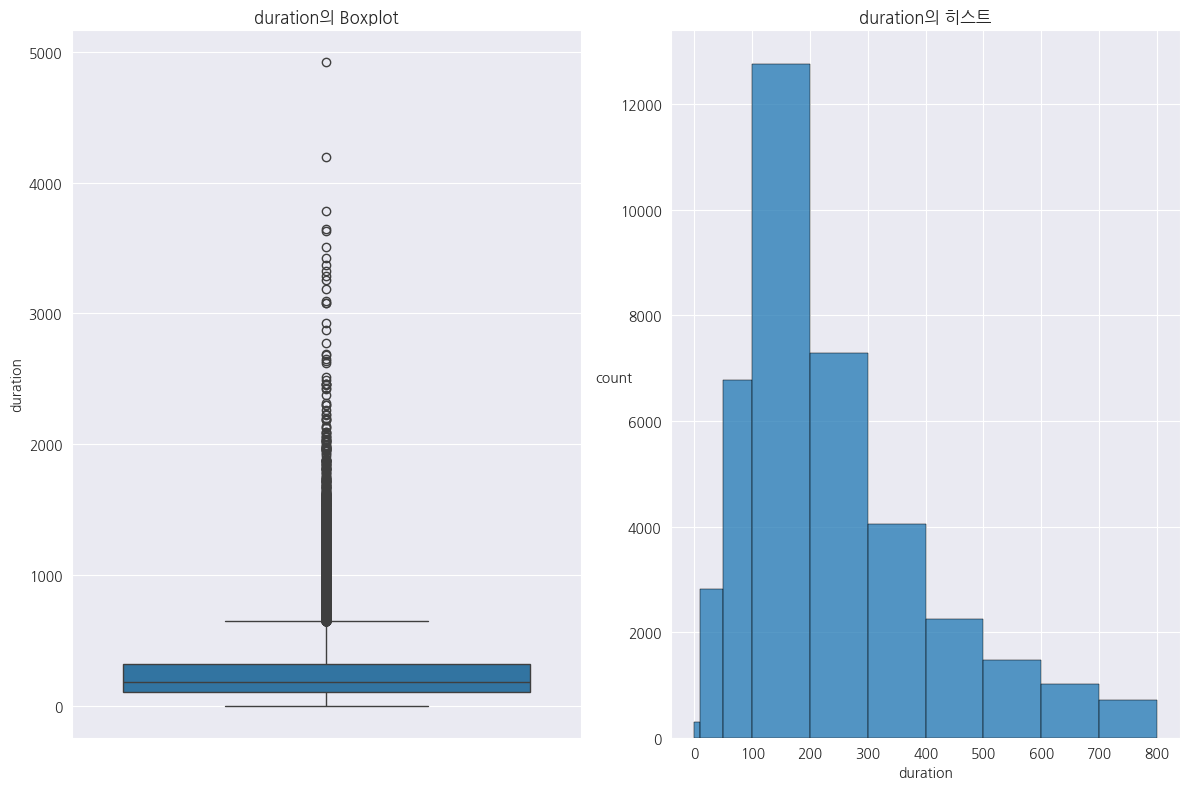

In [13]:
plt.figure(figsize = (12, 8))

plt.subplot(1,2,1)
plt.title("duration의 Boxplot")
sns.boxplot(data = df, y = 'duration')


plt.subplot(1,2,2)
plt.title("duration의 히스트")
# data 누수, 독립변수 하나가 종속변수에 너무 큰 영향을 미치ㅣㄴ느 ㄴ거
# df['duration_bins'] = pd.cut(df['duration'], bins=10)
duration_bins = [0,10,50,100,200,300,400,500,600, 700, 800]
sns.histplot(data = df, x = 'duration', bins=duration_bins, edgecolor='black')
plt.ylabel("count",rotation = 0)

plt.tight_layout()
plt.show()

## Campaign 처리 - 캠페인 동안 연락 횟수 (숫자)
- 평균 2.5, 중앙 2.0, 표편 2.7인데 맥스가 56  -> 이상치 처리하기
- 박스 플롯으로 7이상은 이상치임 -> 2400개 정도 지워야되나
- 15번 이상이 전체 데이터의 1퍼센트임. 이정도는 없애도 될 거 같음
-
- 상식적으로 아직 가입 안했을때 전화를 걺 -> 전화 수가 높으면 '아직' 보험 가입 안 했다. -> 근데 가입 결과니깐 전화수가 높으면 가입율이 높나
- 전화해도 보험 가입 안 할 확률이 높음 or 전화 많이 해서 유혹 끝에 가입 한 사람도 있을 것 -> 아니 근데 보험을 유혹한다고 가입하나
- 뭐가 더 높으려나
### 확인해보니깐 Campaign이 높을 수록 yes가 낮아짐. 아무리 전화해도 가입 안 하는 듯

In [14]:
df['campaign'].value_counts()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [99]:
# len(df[df['campaign'] >=15]) # 15이상은 지우자
# 윈저라이징, 이런 것도 있따....


# 🔎 예시
# 	•	데이터: [1, 2, 3, 4, 5, 100]
# 	•	여기서 100은 너무 큰 이상치라고 하자.
#
# 👉 윈저라이징 (상·하위 5% 절단) 적용:
# 	•	상위 5%를 잘라서 경계값으로 치환 → 100 → 5 로 변환.
# 	•	결과: [1, 2, 3, 4, 5, 5]



df = df.drop(df[df['campaign'] >= 15].index, axis = 0)

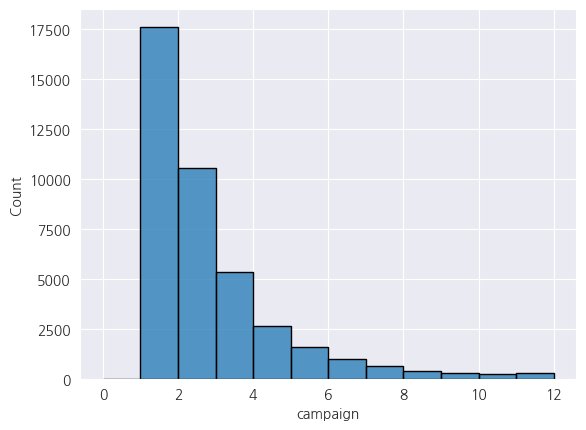

In [16]:
campaign_bins = [0,1,2,3,4,5,6,7,8,9,10,11,12] # 0이 없네
sns.histplot(data = df, x = 'campaign',  bins=campaign_bins,edgecolor='black')
plt.show()


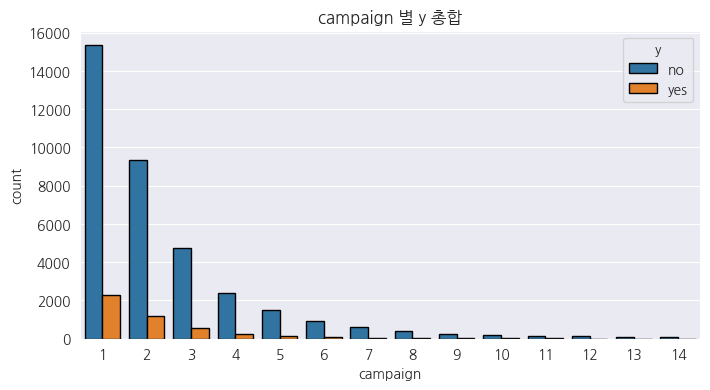

In [17]:
counts = (
    df.groupby('campaign')['y'].value_counts().rename("count").reset_index()
)

plt.figure(figsize = (8, 4))
plt.title("campaign 별 y 총합")
sns.barplot(data = counts, x='campaign', y='count', hue='y',edgecolor='black')
plt.show()

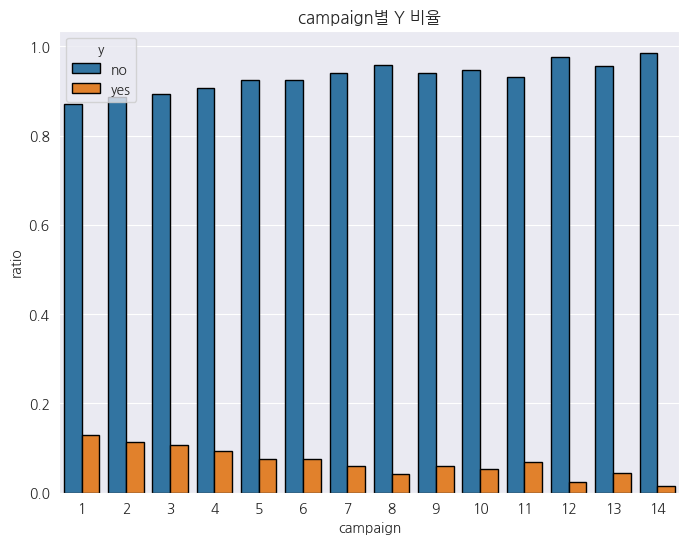

In [18]:
counts = (
    df.groupby('campaign')['y'].value_counts(normalize=True).rename("ratio").reset_index()
)

plt.figure(figsize = (8, 6))
plt.title("campaign별 Y 비율")
sns.barplot(data = counts, x='campaign', y='ratio', hue='y', edgecolor='black')
plt.show()

## poutcome	이전 캠페인의 결과 (범주형)
- 없음 -> 저번 캠페인에 결과가 없으면 안 건 건가 데이터가 누락인건가 -> 이전 캠페인에서 안걸었따면 previous가 없어야됨 -> 없음 -> 누락 아님
- 실패
- 성공 -> 성공인데 또 걸어? -> 다른 상품 추천하려고 걸었나

### 저번에 성공했으면 이번에도 성공한 경우가 많음

In [19]:
df['poutcome'].value_counts()
df[(df['poutcome'] == "nonexistent") & (df['previous'] >= 1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


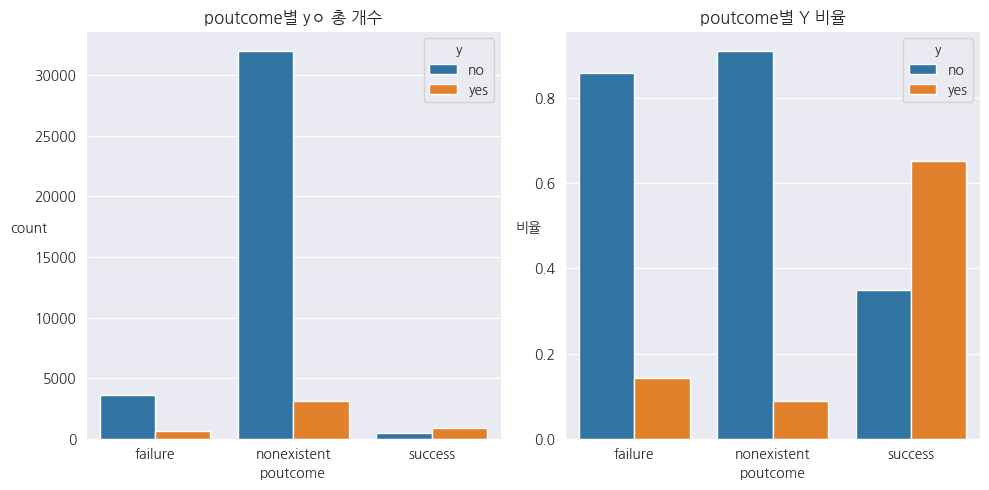

,poutcome,y,ratio
0,failure,no,0.857647
1,failure,yes,0.142353
2,nonexistent,no,0.910860
3,nonexistent,yes,0.089140
4,success,yes,0.651129
5,success,no,0.348871


In [20]:
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
counts = (
    df.groupby('poutcome')['y'].value_counts().rename("count").reset_index()
)
plt.title("poutcome별 yㅇ 총 개수")
plt.ylabel("count",rotation = 0)
sns.barplot(data=counts, x="poutcome", y="count", hue="y")


plt.subplot(1,2,2)
counts = (
    df.groupby("poutcome")["y"]
      .value_counts(normalize=True)
      .rename("ratio")
      .reset_index()
)

sns.barplot(data=counts, x="poutcome", y="ratio", hue="y")
plt.title("poutcome별 Y 비율")
plt.ylabel("비율", rotation = 0)
plt.tight_layout()
plt.show()
counts

In [21]:
df = pd.get_dummies(df, columns=['poutcome'], prefix=['poutcome'])

## previous 이전 캠페인 동안 연락 횟수 (숫자)
- 이전: 이 캠페인 이전에 수행된 연락처 수와 이 고객(numeric)
- 0~7번 있음.
- 1부터 이상치네 -> 근데 뭐 다 가능한 수친데
- 근데 이번 캠페인에는 평균이 2번인데... 일부러 신규 고객에게만 연락한건가? 캠페인 시작한지 얼마 안된건가, 나중에 month도 봐야될듯
- 0번이 제일 많은데 그럼 이번 캠페인에 처음으로 받은 사람이 대부분임 -> 그럼 신규한테만 한게 맞는듯? 아니면 구질구질하게 연락한듯
### 전에 전화를 좀 걸었으면 성공 확륭이 높음

In [22]:
df['previous'].value_counts()

previous
0    35147
1     4559
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

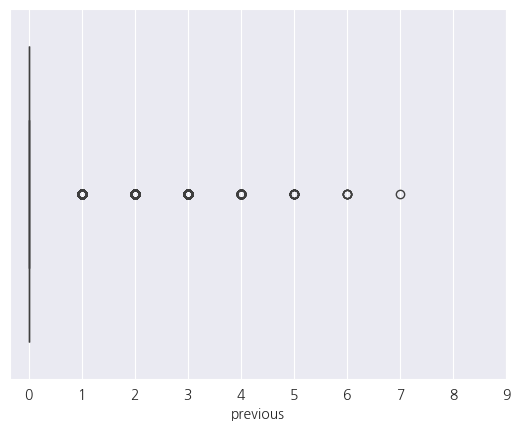

In [23]:
sns.boxplot(data = df, x = 'previous')
plt.xticks(np.arange(0, 10, 1))
plt.show()

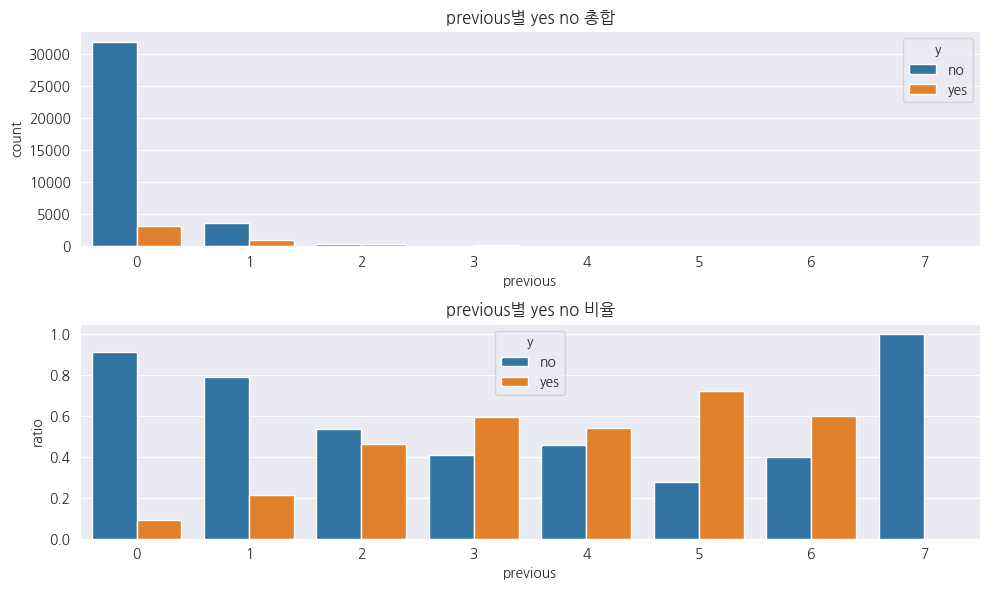

In [24]:
plt.figure(figsize = (10, 6))

plt.subplot(2,1,1)
counts = (
    df.groupby('previous')["y"].value_counts().rename("count").reset_index()
)
plt.title("previous별 yes no 총합")
sns.barplot(data=counts, x='previous', y="count",hue='y')
# 나머지가 작아서 안 보이네

plt.subplot(2,1,2)
counts = (
    df.groupby('previous')["y"].value_counts(normalize=True).rename("ratio").reset_index()
)
plt.title("previous별 yes no 비율")
sns.barplot(data=counts, x='previous', y="ratio",hue='y')

plt.tight_layout()
plt.show()

## pdays 이전 캠페인 후 지난 일수 (숫자)
- **pdays: 이전 캠페인에서 클라이언트에게 마지막으로 연락한 후 경과한 일수(numeric; 999는 클라이언트에게 이전에 연락하지 않았음을 의미함)**

In [25]:
df['pdays'].value_counts()

pdays
999    39255
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [26]:
# df['pdays'] = df['pdays'].replace(999, np.nan)
# df

## 날짜별로 보기.
- 그럼 이것도 shuffle = false로 해야되나.. 12월꺼보고 11월 예측하면 안되니깐?
- 보험 가입이 월별로 다른가? -> 월별로는 딱히 뭐 없는 거 같음
 - 그럼 고객 특성만 영향있는거 아닌가
- 아 근데 경제 지표는 과거 영향도 있으니깐 해야될듯?
- 아 그래프 ㅂㄹ데 뭐가 낫지

In [27]:
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df['month'] = df['month'].map(month_map)

df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

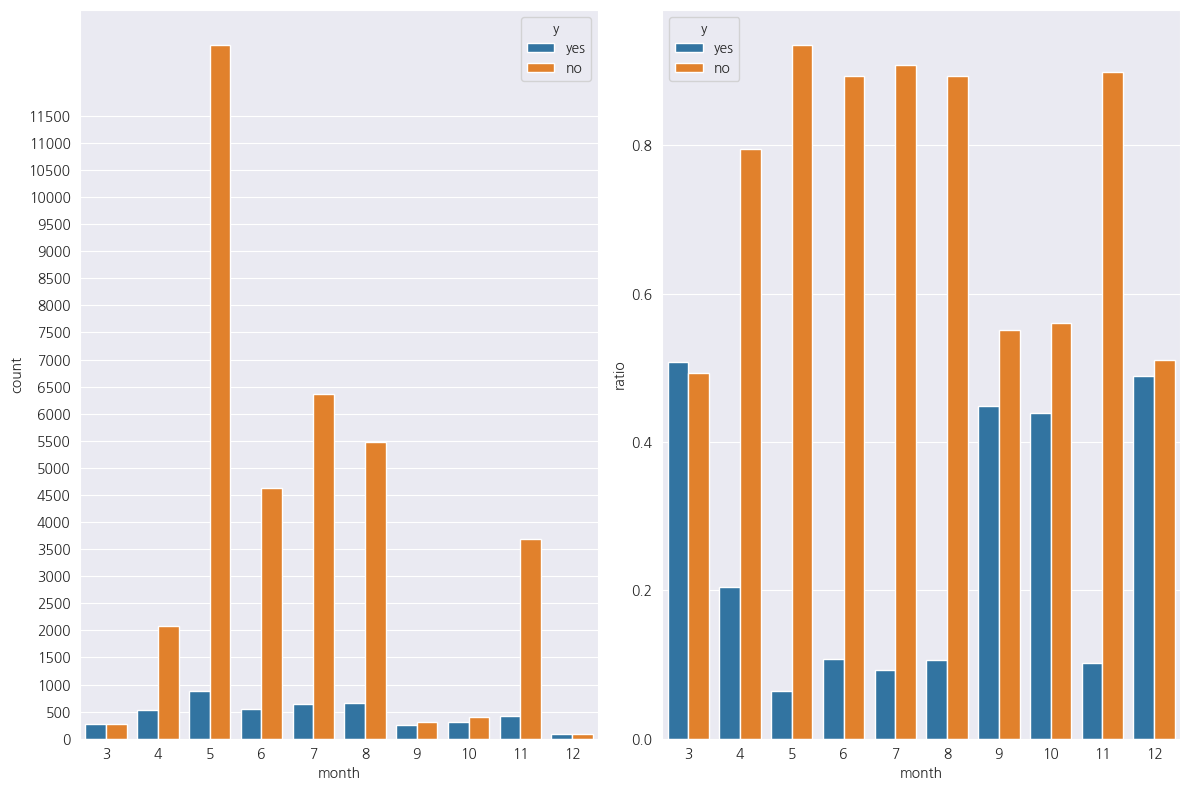

In [28]:


plt.figure(figsize = (12, 8))

plt.subplot(1,2,1)
counts = (
    df.groupby('month')['y'].value_counts().rename("count").reset_index()
)
sns.barplot(data=counts, x='month', y='count', hue='y')
plt.yticks(np.arange(0, 12000, 500))

plt.subplot(1,2,2)
counts = (
    df.groupby('month')['y'].value_counts(normalize=True).rename("ratio").reset_index()
)
sns.barplot(data=counts, x='month', y='ratio', hue='y')



plt.tight_layout()
plt.show()

In [29]:
for i in range(3,13):
    print(f"{i}월의 yes = ", len(df[(df['month'] == i) & (df['y'] == "yes")]))
    print(f"{i}월의 no = ", len(df[(df['month'] == i) & (df['y'] == "no")]),"\n")

# 딱히 월별로 다른 것 같지않음.
# y/n 비율이 비등비등한 곳은 표본이 적어서 그렇게 나온 거 같고
# y/n count가 높은 것도 단순히 연락한 사람이 많아서 yes가 그나마 높은데 연락한 것에 비해서 높은 건 아니고... 비효율적이라고 봄.

3월의 yes =  276
3월의 no =  268 

4월의 yes =  538
4월의 no =  2090 

5월의 yes =  884
5월의 no =  12813 

6월의 yes =  557
6월의 no =  4633 

7월의 yes =  646
7월의 no =  6359 

8월의 yes =  655
8월의 no =  5482 

9월의 yes =  256
9월의 no =  314 

10월의 yes =  315
10월의 no =  402 

11월의 yes =  416
11월의 no =  3684 

12월의 yes =  89
12월의 no =  93 



### 요일별로 보기
- 별 차이 없는 듯

<Axes: xlabel='day_of_week', ylabel='count'>

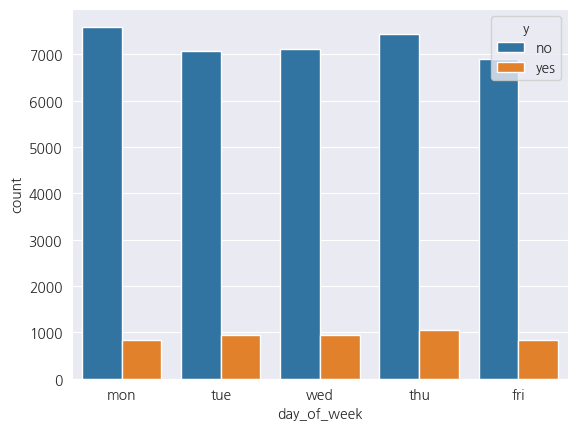

In [30]:
df['day_of_week'].unique()
sns.countplot(data = df, x='day_of_week', hue='y')

In [31]:
day_map = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
df['day'] = df['day_of_week'].map(day_map)

df['day_sin'] = np.sin(2 * np.pi * df['day']/5)
df['day_cos'] = np.cos(2 * np.pi * df['day']/5)

## job column 보기
- 그냥

In [32]:
df['job'].value_counts()
df = pd.get_dummies(df, columns=['job'])

In [33]:
df

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,married,basic.4y,no,no,no,telephone,5,mon,261,...,False,True,False,False,False,False,False,False,False,False
1,57,married,high.school,unknown,no,no,telephone,5,mon,149,...,False,False,False,False,False,True,False,False,False,False
2,37,married,high.school,no,yes,no,telephone,5,mon,226,...,False,False,False,False,False,True,False,False,False,False
3,40,married,basic.6y,no,no,no,telephone,5,mon,151,...,False,False,False,False,False,False,False,False,False,False
4,56,married,high.school,no,no,yes,telephone,5,mon,307,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,married,professional.course,no,yes,no,cellular,11,fri,334,...,False,False,False,True,False,False,False,False,False,False
41184,46,married,professional.course,no,no,no,cellular,11,fri,383,...,False,False,False,False,False,False,False,False,False,False
41185,56,married,university.degree,no,yes,no,cellular,11,fri,189,...,False,False,False,True,False,False,False,False,False,False
41186,44,married,professional.course,no,no,no,cellular,11,fri,442,...,False,False,False,False,False,False,False,True,False,False


## martial 컬럼 보기
- unknown 78개인데 나머지 컬럼에 문제는 없긴한데.. 없앨까. 대체할까 냅둘까......
- 아 근데 음...삭제하고싶음 깔끔하게
- 미혼, 결혼, 이혼 말고 또 뭐있지?... 게이레즈 불법동거? 그래도 미혼아닌가

In [34]:
df['marital'].value_counts()

marital
married     24673
single      11456
divorced     4563
unknown        78
Name: count, dtype: int64

In [35]:
df = df.drop(df[df['marital'] == "unknown"].index, axis=0)
df = pd.get_dummies(df, columns=['marital'], prefix='marital')

## education column 확인
- 문맹이 18명임. 얘네는 보험 가입하면 망할거 같은데 일단 문맹도 가입을 하긴 함. 3명임. 호갱당한건가...
- 문맹 사무직에 + 사업가도 있는데 가능한가... 너무 저학력자를 무시하는건가..
- 그냥 문맹은 삭제하고 나머지는 인코딩하기

In [36]:
df['education'].value_counts()

education
university.degree      12021
high.school             9405
basic.9y                5978
professional.course     5187
basic.4y                4113
basic.6y                2266
unknown                 1704
illiterate                18
Name: count, dtype: int64

In [37]:
df = df.drop(df[df['education'] == "illiterate"].index, axis = 0)

In [38]:
df = pd.get_dummies(df, columns=['education'], prefix='edu')

## housing, loan, defualt, contact 변환

In [39]:
df['housing'].value_counts()

housing
yes        21332
no         18361
unknown      981
Name: count, dtype: int64

In [40]:
df['loan'].value_counts()

loan
no         33522
yes         6171
unknown      981
Name: count, dtype: int64

In [41]:
df['default'].value_counts() # yes가 3개
# df[df['default'] == "yes"]
df = df.drop(df[df['default'] == 'yes'].index, axis=0)

In [42]:
df = pd.get_dummies(df, columns=['housing','loan','default'], prefix=['housing','loan','default'])

In [43]:
df = pd.get_dummies(df, columns=['contact'], prefix=['contact'])

# 모델링

In [44]:
df['y'] = df['y'].map({'yes':1, 'no':0})
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,default_no,default_unknown,contact_cellular,contact_telephone
0,56,5,mon,261,1,999,0,1.1,93.994,-36.4,...,True,False,False,True,False,False,True,False,False,True
1,57,5,mon,149,1,999,0,1.1,93.994,-36.4,...,True,False,False,True,False,False,False,True,False,True
2,37,5,mon,226,1,999,0,1.1,93.994,-36.4,...,False,False,True,True,False,False,True,False,False,True
3,40,5,mon,151,1,999,0,1.1,93.994,-36.4,...,True,False,False,True,False,False,True,False,False,True
4,56,5,mon,307,1,999,0,1.1,93.994,-36.4,...,True,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,11,fri,334,1,999,0,-1.1,94.767,-50.8,...,False,False,True,True,False,False,True,False,True,False
41184,46,11,fri,383,1,999,0,-1.1,94.767,-50.8,...,True,False,False,True,False,False,True,False,True,False
41185,56,11,fri,189,2,999,0,-1.1,94.767,-50.8,...,False,False,True,True,False,False,True,False,True,False
41186,44,11,fri,442,1,999,0,-1.1,94.767,-50.8,...,True,False,False,True,False,False,True,False,True,False


In [45]:
df['pdays'].value_counts()

pdays
999    39162
3        439
6        409
4        117
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        27
1         26
15        24
14        20
8         18
0         15
16        10
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40671 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      40671 non-null  int64  
 1   month                    40671 non-null  int64  
 2   day_of_week              40671 non-null  object 
 3   duration                 40671 non-null  int64  
 4   campaign                 40671 non-null  int64  
 5   pdays                    40671 non-null  int64  
 6   previous                 40671 non-null  int64  
 7   emp.var.rate             40671 non-null  float64
 8   cons.price.idx           40671 non-null  float64
 9   cons.conf.idx            40671 non-null  float64
 10  euribor3m                40671 non-null  float64
 11  nr.employed              40671 non-null  float64
 12  y                        40671 non-null  int64  
 13  poutcome_failure         40671 non-null  bool   
 14  poutcome_nonexistent     40

## 독립변수 건져내기

In [47]:
X = df.drop(columns=['y', 'duration', 'day_of_week'])
y = df['y']

### 이거 셔플 안 하면 그럼 오름차순으로 정해야되는거아닌가. 데이터를

In [95]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2,shuffle = False)

In [93]:
df = df.sort_values(by="month")
df

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,default_no,default_unknown,contact_cellular,contact_telephone
27789,39,3,tue,395,3,999,0,-1.8,92.843,-50.0,...,False,False,True,True,False,False,True,False,True,False
27775,32,3,mon,75,2,999,0,-1.8,92.843,-50.0,...,False,False,True,True,False,False,True,False,True,False
27811,88,3,wed,323,1,999,0,-1.8,92.843,-50.0,...,True,False,False,True,False,False,True,False,True,False
27788,38,3,tue,59,1,999,0,-1.8,92.843,-50.0,...,True,False,False,True,False,False,True,False,True,False
27704,44,3,mon,239,1,999,0,-1.8,92.843,-50.0,...,True,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38981,46,12,fri,696,10,999,0,-3.0,92.713,-33.0,...,False,True,False,False,True,False,True,False,True,False
39053,47,12,thu,155,1,999,1,-3.0,92.713,-33.0,...,False,False,True,True,False,False,True,False,True,False
39081,27,12,tue,396,1,999,0,-3.0,92.713,-33.0,...,False,False,True,True,False,False,True,False,True,False
38982,25,12,fri,1139,2,4,1,-3.0,92.713,-33.0,...,True,False,False,True,False,False,True,False,True,False


In [98]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    classification_report,roc_auc_score
)
# Smote, fit_resamble
# 작은 쪽을 늘린느 방식
# SMOTE 소수인 yes클래스의 가짜 데이터 샘플들을 추가로 늘려줌
# 쓰면 훈련훈련데이터에만 저굥
# yes의 주변을 보고 이웃한 5개의 점을 보고 그 5개랑 비슷한 점을 증폭시킴
# 데이터 불균형할때 맞추는 방법
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("SMOTE 전  :", y_train.value_counts().to_dict())
print("SMOTE 후  :", dict(zip(*np.unique(y_train_res, return_counts=True))))


models = {
    "XGBoost": XGBClassifier(
        n_estimators=500, # 약한 학습기
        learning_rate=0.05,  # 트리 기여도 조절
        colsample_bytree=0.8, # 각 트리 학습시 피쳐의 80퍼만 랜덤 뽑아서
        objective='binary:logistic',
        n_jobs=-1,
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        learning_rate=0.05,
        num_leaves=31,
        colsample_bytree=0.8,
        n_jobs=-1,
    ),
    "CatBoost": CatBoostClassifier(
        n_estimators=500,
        learning_rate=0.05,
        depth=6,
        loss_function="Logloss",
        verbose=False,
    ),

    #   배깅

    "RandomForest": RandomForestClassifier(
        n_estimators=800,
        max_depth=None,
        min_samples_split=4,
        n_jobs=-1,
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=300,
        learning_rate=0.1,
    ),
}

for name, clf in models.items():
    print("\n" + "="*80)
    print(f" 모델:  {name}")
    clf.fit(X_train_res, y_train_res)

    has_proba = hasattr(clf, "predict_proba")
    # 각 클래스일 확률을 예측해줌


    if has_proba:
        p_val = clf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, p_val)
    y_pred = clf.predict(X_val)

    print("\nClassification Report")
    print(classification_report(y_val, y_pred, digits=3))
    if has_proba:
        print(f"AUC: {auc:.4f}")

/Users/yoonwogud/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


SMOTE 전  : {0: 30449, 1: 2087}
SMOTE 후  : {np.int64(0): np.int64(30449), np.int64(1): np.int64(30449)}

 모델:  XGBoost

Classification Report
              precision    recall  f1-score   support

           0      0.697     0.980     0.815      5606
           1      0.554     0.055     0.099      2529

    accuracy                          0.692      8135
   macro avg      0.626     0.517     0.457      8135
weighted avg      0.652     0.692     0.592      8135

AUC: 0.6203

 모델:  LightGBM
[LightGBM] [Info] Number of positive: 30449, number of negative: 30449
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2009
[LightGBM] [Info] Number of data points in the train set: 60898, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000



## 결과
- 예측한것중에서 맞는ㄴ것 or 실제중에서 맞는것... 콜센터 직원이 정해져있으니깐 precision으로... 직원이 ㅈㄴ많으면 후자로...
- precision을 높도록 수정하였음. 리콜도 고려해야되나? 아 근데 목적이 미탐보다는 오탐아닌가
- 배깅이 제일 높은듯
- Classification Report
-
              precision    recall  f1-score   support

           0      0.698     0.991     0.819      5606
           1      0.718     0.049     0.092      2529

    accuracy                          0.698      8135
   macro avg      0.708     0.520     0.456      8135
weighted avg      0.704     0.698     0.593      8135

AUC: 0.7238